<a href="https://colab.research.google.com/github/Kalpesh-Rajput/Netflix_Movies_and_TV_Show_Clustering/blob/main/KR_%7C_Netflix_Movies_and_TV_Show_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title - Netflix Movie and TV Shows Clustering </u></b>




##### **Project Type**    - Unsupervised (Clustering, Content Based Recommendation System)
##### **Contribution** - Individual

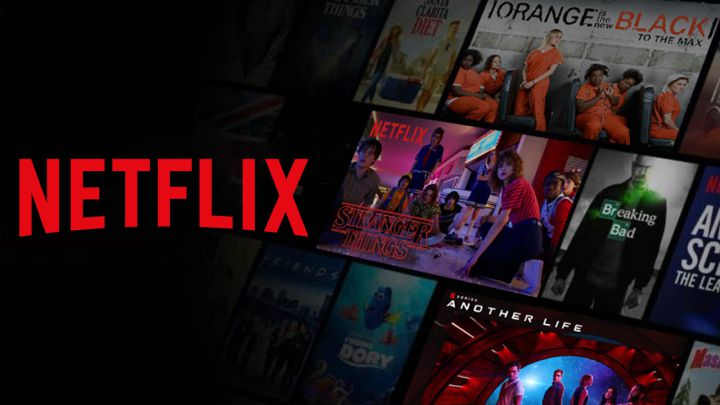



# **GitHub Link**


# **Project Summary**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

In this project, we worked on a text clustering problem where we had to classify/group the Netflix movie/shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

- The dataset contained about 7787 records, and 11 attributes.

- We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

- Creating cluster using following attributes: director, cast, country, genre, rating and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

- We used Principal Component Analysis (PCA) to handle the curse of dimensionality.

- We built Two types of clusters using the K-Means Clustering and Agglomerative Heirachycal clustering algorithm and find out optimal number of clusters using diffrent technique such as elbow method, silhoutte score and dendogram etc.

- A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.

# **Index**
1. Problem Statement
2. Importing the Libraries and the Dataset
3. Understanding Data
4. Exploratory Data Analysis
5. Data Cleaning
6. Textual Data Preprocessing
7. Clusters Impelementation
8. Recommendation System.
9. Conclusions

# **General Guidelines** : -  


1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# **1.Problem Statement**


* Netflix is the world's largest online streaming service provider, with over 220 million subscribers as of 2022-Q2. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.
* We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.
* The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

## **2. Know Your Data**

###Importing the libraries and the dataset:

In [2]:
# importing  libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing wordcloud library forcreating word clouds

from wordcloud import WordCloud, STOPWORDS
# Below libraries are used for text data prerocessing

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
string.punctuation
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Importing Warnings library. it Would help to throw away warnings caused.

import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Dataset Loading

In [3]:
# Loading Dataset

df = pd.read_csv('/content/drive/MyDrive/Capstone Project 4 - Netflix Movies and TV Show Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
# top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Size of dataset

In [6]:
# Row and Column Count of Dataset
print(f'Number of Rows : {df.shape[0]} \nNumber of Columns {df.shape[1]}' )

Number of Rows : 7787 
Number of Columns 12


### Unique values

In [7]:
# Unique values in each columns
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## <b> 3 Attribute Information </b>
1. **show_id** : Unique ID for every Movie / Tv Show
2. **type** : Identifier - A Movie or TV Show
3. **title** : Title of the Movie / Tv Show
4. **director** : Director of the Movie
5. **cast** : Actors involved in the movie / show
6. **country** : Country where the movie / show was produced
7. **date_added** : Date it was added on Netflix
8. **release_year** : Actual Releaseyear of the movie / show
9. **rating** : TV Rating of the movie / show
10. **duration** : Total Duration - in minutes or number of seasons
11. **listed_in** : Genre
12. **description**: The Summary description

### Dataset Information

In [8]:
# Information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Duplicate Values

In [9]:
# Checking whether our dataset contain Duplicate value
df.duplicated().sum()

0

###As per above out put we can see that we don't have any duplicate value in our dataset

### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
# Percentage of missing values
round(df.isna().sum()/len(df)*100,2)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

<Axes: >

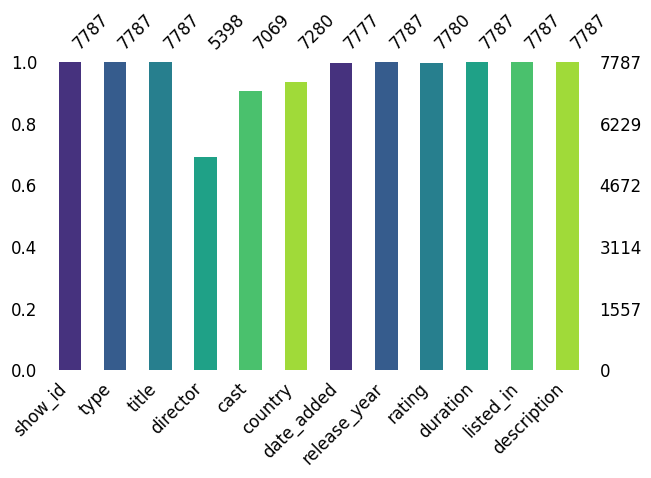

In [12]:
# PLoting Chart for missing values
import missingno as msno
msno.bar(df,figsize=(7,4),fontsize = 12,color=sns.color_palette("viridis"))

<Axes: >

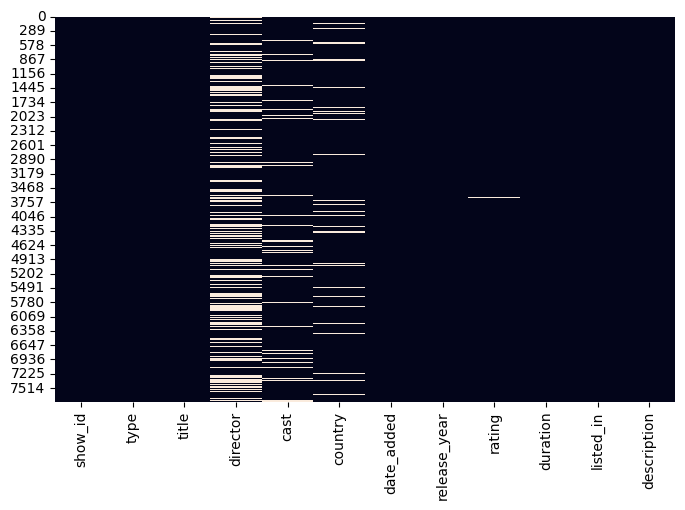

In [13]:
# Checking Null Value by plotting Heatmap

plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(),cbar = False)

- NaN values present in the director, cast, country, date_added and rating column.

- All the data that we have is related to each specific movie. So, we can't impute any null values with using any method. Also we don't want to loose any data since the data size is small for that reason we simply impute nan values with empty string in below procedure after analyzing each columns.

### Attributes name

In [14]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Statistical Summary

In [15]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Counting unique value

In [16]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f'number of unique {i} column:, {df[i].nunique()}  \n nunique values :\n{df[i].unique()}')
  print('='*150)

number of unique show_id column:, 7787  
 nunique values :
['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
number of unique type column:, 2  
 nunique values :
['TV Show' 'Movie']
number of unique title column:, 7787  
 nunique values :
['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
number of unique director column:, 4049  
 nunique values :
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
number of unique cast column:, 6831  
 nunique values :
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, 

- **After analysing dataset we are more focusing toward 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description' columns and these column carry a lots of information.**
- **We are building our model on the top of mentioned features where those feature are used to create one cluster column to implement K-means, Hierarchical clustering and building content based recommandation system as well.**

## **4. EDA**
Exploratory Data Analysis (EDA) is the very first step before you can perform any changes to the dataset or develop a statistical model to answer business problems. In other words, the process of EDA contains summarizing, visualizing and getting deeply acquainted with the important traits of a data set.

#### **4.1. Type column**

In [17]:
# Number of unique values
df['type'].nunique()


2

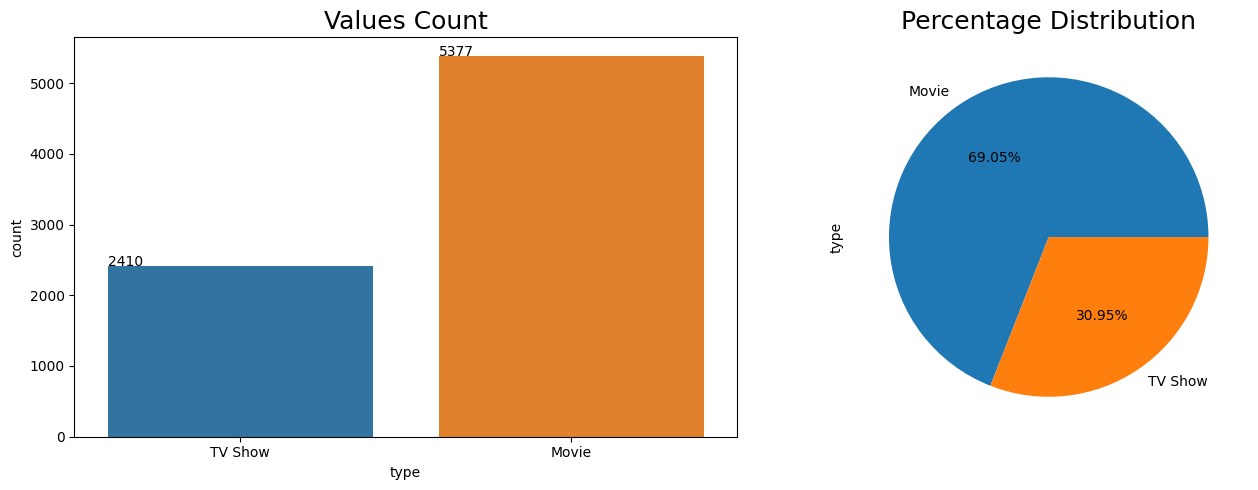

In [18]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# coutplot
graph = sns.countplot(x=df['type'], ax=ax[0])
graph.set_title('Values Count', size=18)
# adding value count on the top of bar
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# piechart
df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1])
plt.title('Percentage Distribution', size=18)

plt.tight_layout()
plt.show()



**Obesrvation:**
1. Greater number of count belong from movie class than Tv show class.  
2. 69% of data belong from Movie class and 31% of data belong from TV shows

#### **4.2. Title column**

In [19]:
df['title'].nunique()

7787

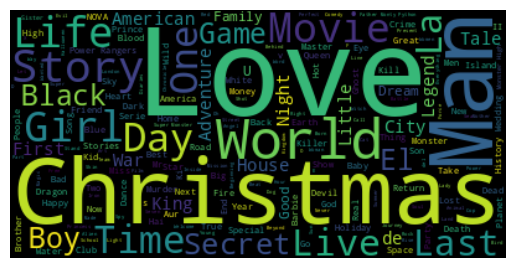

In [20]:
# text documents
text = " ".join(word for word in df['title'])

# create the word cloud
wordcloud = WordCloud(stopwords = STOPWORDS).generate(text)


# plot the word cloud
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()


**Obesrvation:** word like Christmas, Love, World, Man, Story are very comman word which are appear most of the time in movie title column.

#### **4.3 Director column**

In [21]:
print(f"Number of unique classes : {df.director.nunique()}")
print(f"Counting Null Values : {df.director.isna().sum()}")

Number of unique classes : 4049
Counting Null Values : 2389


In [22]:
print(f"Number of TV Show directed by director is :{df[df['type']== 'TV Show']['director'].value_counts().sum()}")
print(f"Number of Movies Directed by director is  :{df[df['type']=='Movie']['director'].value_counts().sum()}")

Number of TV Show directed by director is :184
Number of Movies Directed by director is  :5214


Text(0.5, 1.0, 'top 10 director who directed Movies')

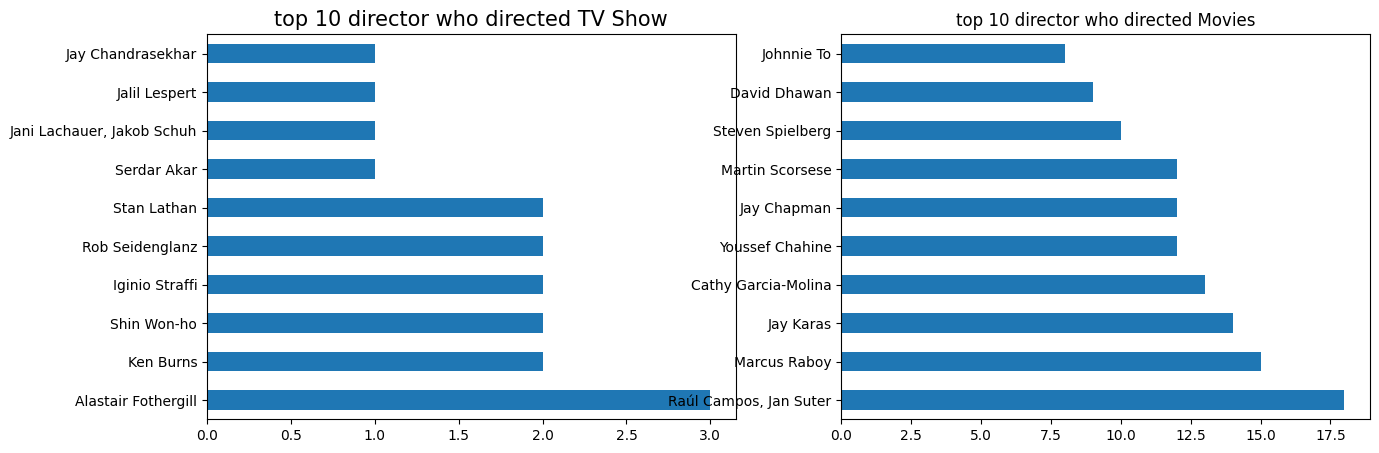

In [23]:
fig,ax = plt.subplots(1,2 , figsize = (15,5))

# top 10 director who directed TV show
show = df[df['type']== 'TV Show']['director'].value_counts()[:10].plot(kind = 'barh' , ax = ax[0])
show.set_title('top 10 director who directed TV Show', size=15)

# top 10 director who directed Movies
movie = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind = 'barh',ax = ax[1])
movie.set_title('top 10 director who directed Movies')


**Obesrvation:**  
1. Alstair Fothergill directed highest shows in datalist which is 3.
2. Raul Campos and Jan Suter together have directed 18 movies, higher than anyone in the dataset.

#### **4.4 Cast column**

In [24]:
# seperating actor from cast column
cast = df['cast'].str.split(',',expand = True).stack().reset_index(level = 1 , drop = True)

# top actors name who play highest role in movie/show.
cast.value_counts()


 Anupam Kher          38
 Takahiro Sakurai     28
 Om Puri              27
Shah Rukh Khan        27
 Boman Irani          25
                      ..
 Juan Manuel Diaz      1
 Ana Wills             1
 Mauricio Figueroa     1
 Matias Maldonado      1
 Rachel Khoo           1
Length: 35372, dtype: int64

In [25]:
print(f"Number of TV Show actors : {len(df[df['type']=='TV Show']['cast'].str.split(',', expand  = True).stack().reset_index(level = 1 , drop = True).value_counts())}")
print(f"Number of actors of movies : {len(df[df['type']=='Movie']['cast'].str.split(',', expand =  True).stack().reset_index(level = 1 , drop = True).value_counts())}")

Number of TV Show actors : 14136
Number of actors of movies : 24731


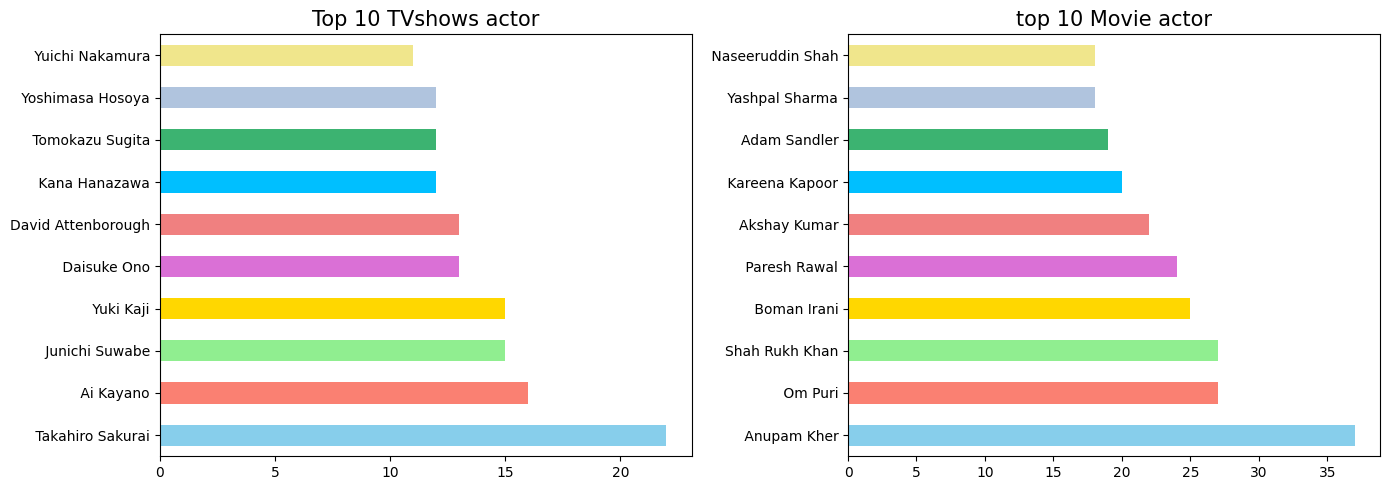

In [26]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVShows_actors = df[df['type'] == 'TV Show']['cast'].str.split(',' , expand  = True).stack().reset_index(level = 1 , drop = True)
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'orchid', 'lightcoral', 'deepskyblue', 'mediumseagreen', 'lightsteelblue', 'khaki']

# plotting actor who appered highest number of TV Show
a = top_TVShows_actors.value_counts().head(10).plot(kind = 'barh' ,color = colors, ax = ax[0])
a.set_title('Top 10 TVshows actor', size=15)

# seperating movie actor from cast column
top_Movie_actors = df[df['type']=='Movie']['cast'].str.split(',' , expand = True).stack().reset_index(level = 1 , drop =True)

# plotting actor who appered highest number of Movie
b = top_Movie_actors.value_counts().head(10).plot(kind = 'barh' , color = colors , ax = ax[1])
b.set_title('top 10 Movie actor', size=15)


plt.tight_layout()
plt.show()


**Observation :**
1. Anupam Kher, Shahrukh Khan, Om Puri play highest number of role in the movies.
2. Takahiro Sakurai, Yuki Kaji, Daisuke Ono play highest role in the TV shows.

#### **4.5 Country column**

In [27]:
df['country'].nunique()

681

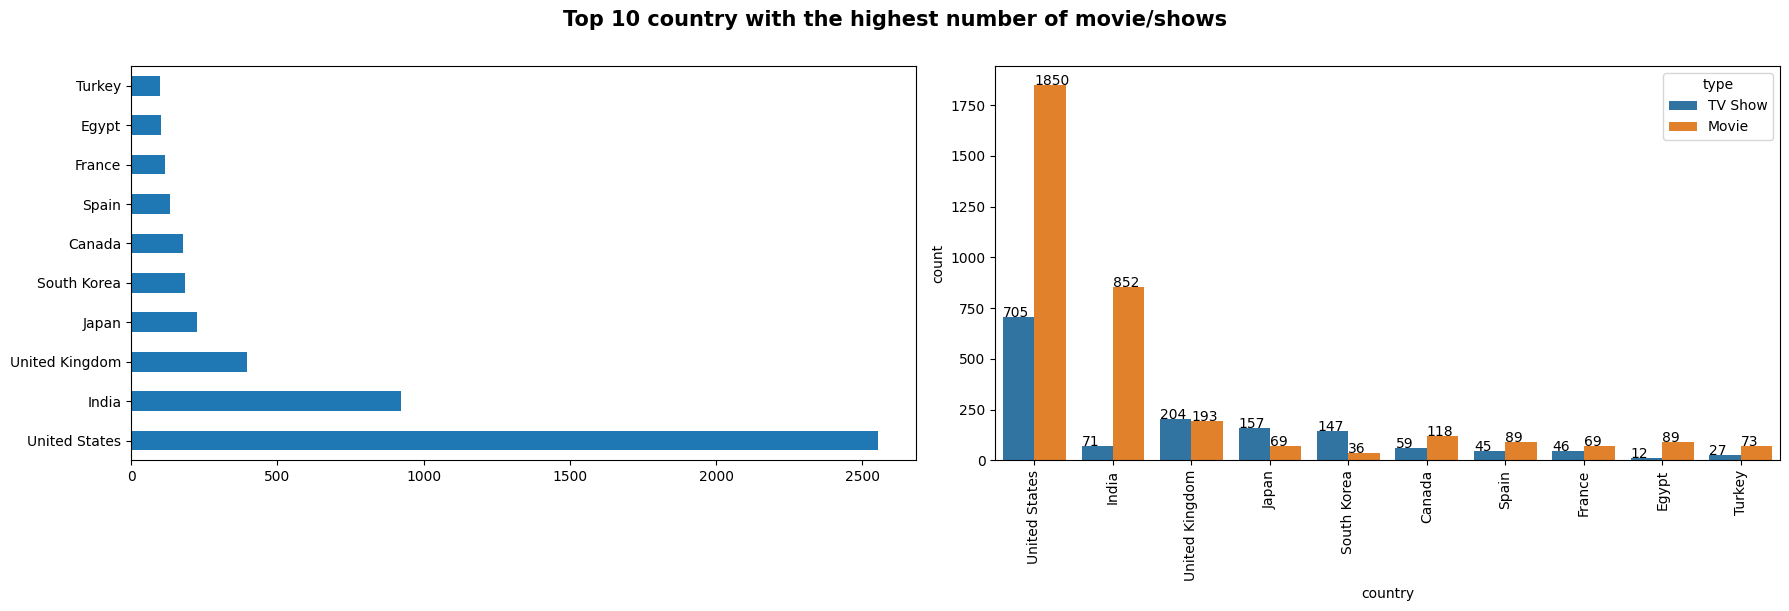

In [28]:
fig,ax = plt.subplots(1,2, figsize=(18,6))
plt.suptitle('Top 10 country with the highest number of movie/shows', weight='bold', size=15, y=1.01)

# univariate analysis

df['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0]) #sns.countplot(x="country", data=df, order=df['country'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis

graph = sns.countplot(x="country", data=df, hue='type', order=df['country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))



plt.tight_layout()
plt.show()

**Observation :** The highest number of movies / TV shows were based out of the US, followed by India and UK.

In [29]:
# % share of movies / tv shows by top 10 countries
round(df['country'].value_counts().nlargest(10).sum()/len(df)*100,2)

63.07

- The top 10 countries together account for about 63% of all movies and TV shows in the dataset.

#### **4.6 Release_Year column**

In [30]:
# number of unique values
df['release_year'].nunique()

73

In [31]:
print(f'The oldest Record of TV/Movie show is : {df.release_year.min()}')
print(f'The Latest Record of TV/Movie show is : {df.release_year.max()}')

The oldest Record of TV/Movie show is : 1925
The Latest Record of TV/Movie show is : 2021


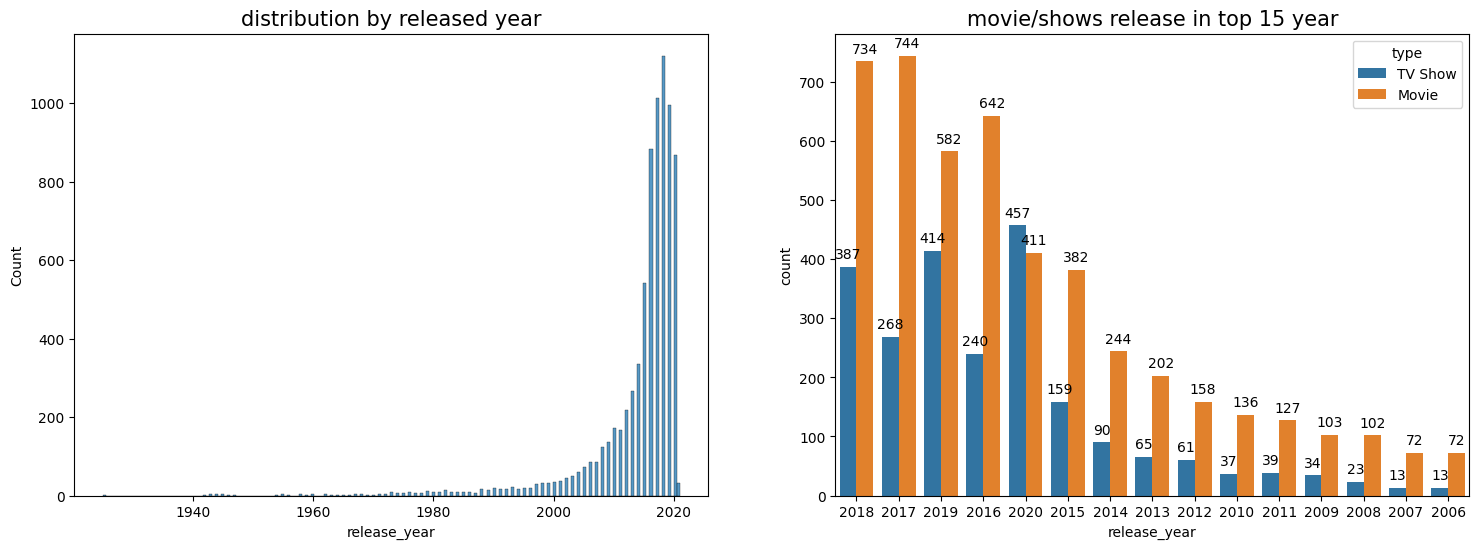

In [32]:
fig,ax = plt.subplots(1,2,figsize = (18,6))

# Univariate analysis
hist = sns.histplot(df['release_year'], ax = ax[0])
hist.set_title('distribution by released year',size = 15)

# Bivariate analysis
count = sns.countplot(x = 'release_year' ,hue = 'type', data = df ,order = df['release_year'].value_counts().index[:15],ax = ax[1])
count.set_title('movie/shows release in top 15 year', size=15)

for p in count.patches:
  count.annotate(format(p.get_height(), '0.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')




**Obesrvation :**
1. Netflix has greater number of new movies / TV shows than the old ones.
2. Highest number of movie/shows are relesed in netflix in between 2015-2020 and highest number of count belong from 2018 year.

#### **4.7 Rating column**

In [33]:
# Number of unique values in Rating column

df.rating.nunique()

14

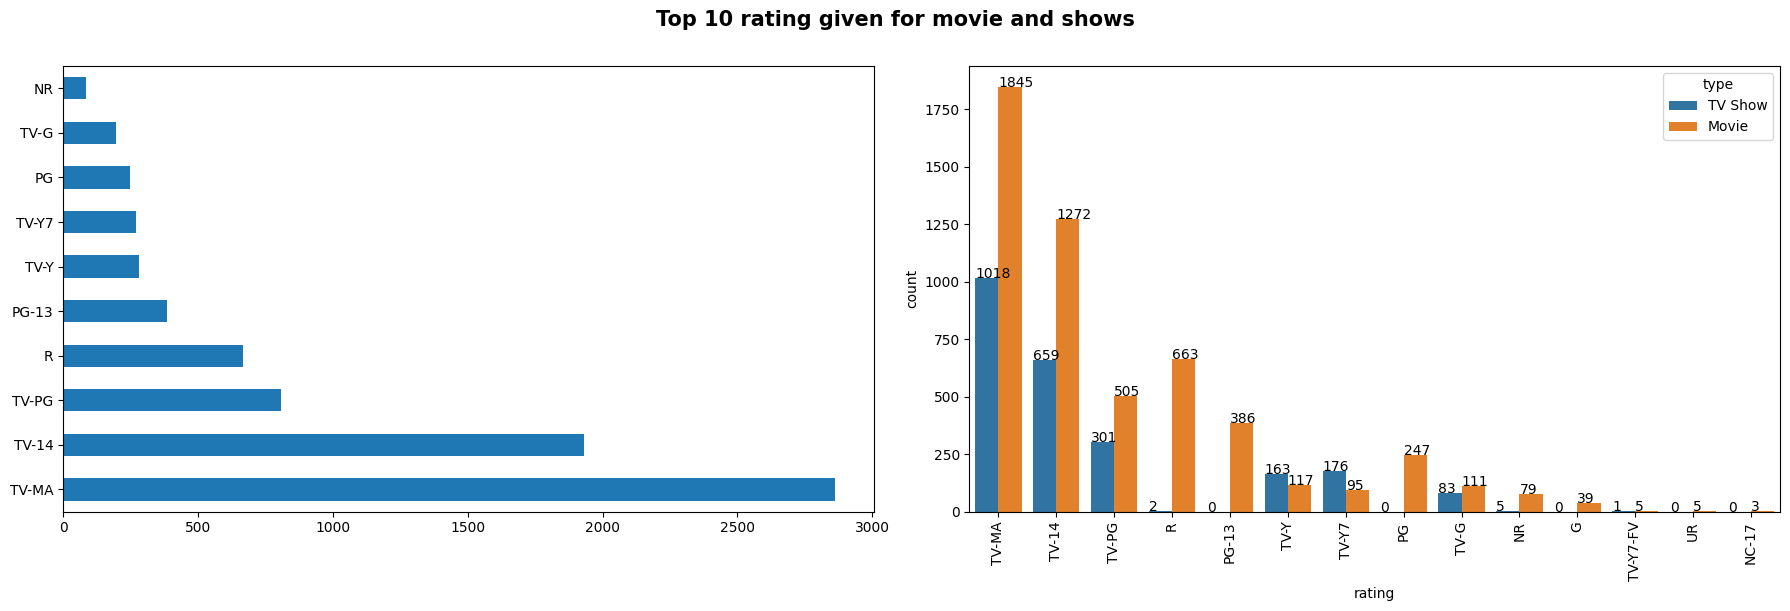

In [34]:
fig,ax = plt.subplots(1,2, figsize=(18,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', size=15, y=1.01)

# univariate analysis
df.rating.value_counts()[:10].plot(kind = 'barh' , ax = ax[0])

# bivariate analysis
graph = sns.countplot(x = 'rating' , data = df ,hue = 'type',order = df['rating'].value_counts().index[:15],ax = ax[1] )
plt.xticks(rotation=90)

for p in graph.patches:
  graph.annotate(format(p.get_height(),'0.0f'),(p.get_x(),p.get_height()))

plt.tight_layout()
plt.show()

**Obesrvation**:
1. most of the movie and tv shows have rating of TV-MA (Mature Audiance) then followed by TV-14 (younger audiance).
2. Highest number of rating given for the movies as compared to TV shows it is pretty obivious because of gighet number of category belong from mvoie class as  we can seen earlier in type column.

#### **4.8 Listed_In column (Gener)**

In [35]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [36]:
# seperating genre from listed_in columns for analysis purpose

genres = df['listed_in'].str.split(',' , expand = True).stack().reset_index(level = 1 , drop = True)
genres.head()

# top 10 genre in listed movie/show
genres = genres.value_counts().reset_index().rename(columns = {'index': 'genres' , 0:'count'})
genres[:10]

,genres,count
0,International Movies,2323
1,Dramas,1384
2,Comedies,1074
3,Documentaries,751
4,Dramas,722
5,Action & Adventure,721
6,International TV Shows,690
7,Independent Movies,653
8,TV Dramas,642
9,Romantic Movies,528


In [37]:
# number of genres present in dataset
len(genres)

73

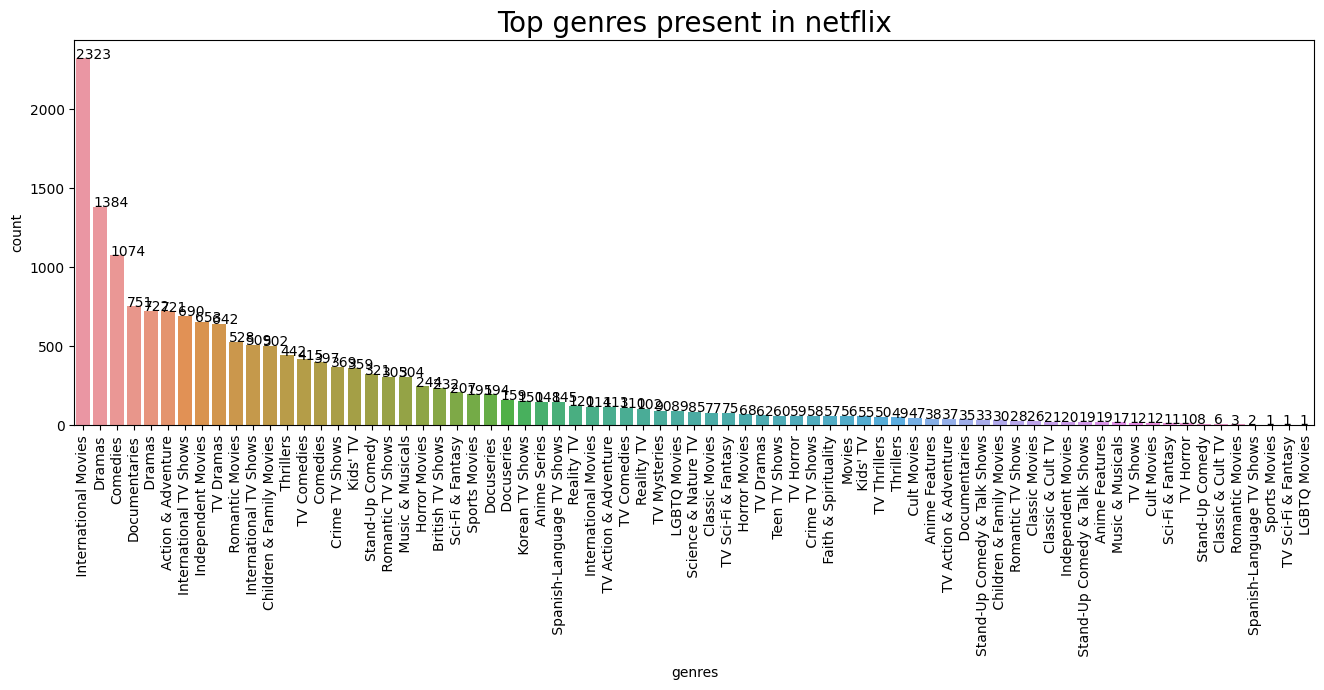

In [38]:
# plotting graph
plt.figure(figsize=(16,5))
graph = sns.barplot(x='genres', y='count', data=genres)
graph.set_title('Top genres present in netflix', size=20)
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.show()

**Obesrvation :**
1. Highest number of genre belong from International movies, Dramas, Comedies respectively.
2. Least number of  genre belong from Classic & cult TV, TV Thriller, Stand-Up comedy and Talk show.

#### **4.9 Description**

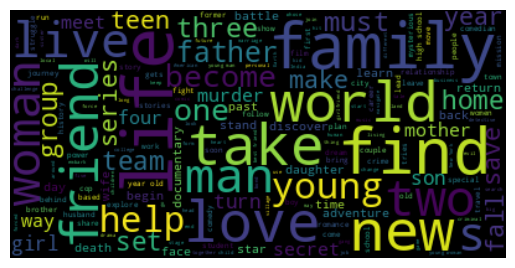

In [41]:
# Text Documents
text = ''.join(word for word in df['description'])

# create the word cloud
wordcloud = WordCloud(stopwords = STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()


**Observation :** Most of the comman words present in description column are family, find, life, love, new, world, friend.

## **5. Data Cleaning**
Data cleaning is the process of modifying data to fit the criteria for a specific problem, and you'll have no idea what you might want to change about a data set until you know what's in it.

After EDA we are perfoming data cleaning process.

In [42]:
df.duplicated().sum()

0

We can see that we don't have any duplicate values in our data set


### **Handling Missing Values**